In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from functions import share, to_index

In [10]:
fc = pd.read_csv('./data/processed/agg_firm_credit.csv', index_col=['sector', 'account'])
fc.columns = pd.to_datetime(fc.columns)
hc = pd.read_csv('./data/processed/agg_household_credit.csv', index_col=['sector', 'account'])
hc.columns = pd.to_datetime(hc.columns)

In [11]:
fc_total = pd.DataFrame(fc.loc[('nonfin', slice(None)), :].sum().rename('fc'))
fc_total.index = pd.to_datetime(fc_total.index)

fc_total = pd.DataFrame(fc.loc[('nonfin', slice(None)), :].sum().rename('fc'))
fc_total.index = pd.to_datetime(fc_total.index)

In [12]:
gdp = pd.read_csv('./data/processed/gdp.csv', index_col=['Unnamed: 0'])
gdp = gdp.T
gdp.index = pd.to_datetime(gdp.index)

In [23]:
# Color Pallettes
colors = ['#347576', '#0AA8A1', '#00A1DE', '#22A8E0', '#1B75BC', '#2B388F', '#000000', '#6C6F70', '#CECFCB']

### **Firm Credit to GDP**

In [24]:
credit_to_gdp = pd.DataFrame(fc_total.fc / gdp.gdp, columns=['total'])
credit_to_gdp = pd.concat([credit_to_gdp, 
                           (fc.loc[('nonfin', 'bonds'), :] / gdp.gdp).rename('bonds'), 
                           (fc.loc[('nonfin', 'loans'), :] / gdp.gdp).rename('loans'),
                           (fc.loc[('nonfin', 'govloans'), :] / gdp.gdp).rename('govloans')], axis=1)

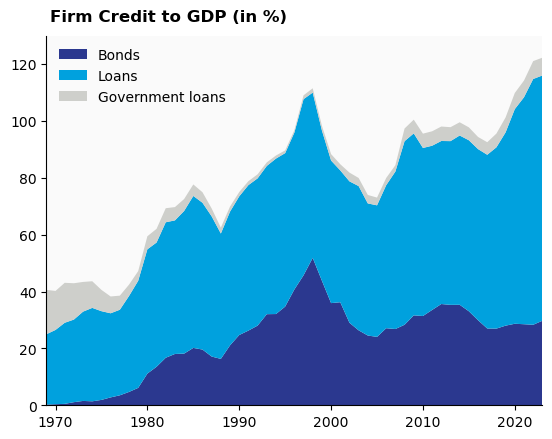

In [73]:
fig, ax = plt.subplots()

ax.stackplot(credit_to_gdp.index, 
             credit_to_gdp.drop(['total'], axis=1).T * 100, 
             labels=['Bonds', 'Loans', 'Government loans'], 
             colors=[colors[5], colors[2], colors[8]])

# ax.set_title('Firm Credit to GDP (in %)', loc='left', pad=10)
ax.legend(loc='upper left', framealpha=0)
ax.set_ylim([0, 130])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)
ax.set_facecolor('#FAFAFA')

# Add titles
fig.text(x=0.13, y=0.91, s='Firm Credit to GDP (in %)', size='large', weight='semibold') # title

plt.show()

In [74]:
fig.savefig('./figures/firm_credit_to_gdp.png')

In [162]:
cs = credit_to_gdp[['bonds', 'loans', 'govloans']].apply(share, axis=1)

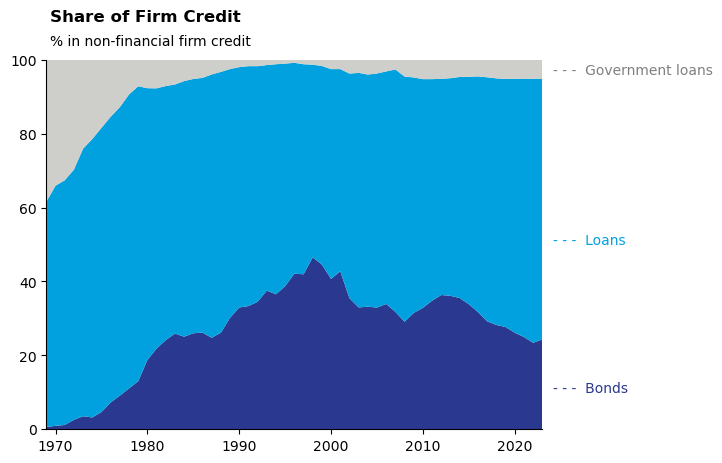

In [175]:
fig, ax = plt.subplots()

y = [10, 50, 96]
i = ['Bonds', 'Loans', 'Government loans']
c = [colors[5], colors[2], 'gray']

ax.stackplot(cs.index, 
             cs.T * 100, 
             labels=['Bonds', 'Loans', 'Government loans'], 
             colors=[colors[5], colors[2], colors[8]])

# ax.set_title('Firm Credit to GDP (in %)', loc='left', pad=10)
# ax.legend(loc='upper left', framealpha=0)
ax.set_ylim([0, 100])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)
ax.set_facecolor('#FAFAFA')

# Add titles
fig.text(x=0.13, y=0.96, s='Share of Firm Credit', size='large', weight='semibold') # title
fig.text(x=0.13, y=0.91, s='% in non-financial firm credit', size='medium', weight='medium') # subtitle

# Add labels
for idx in range(3):
    ax.text(x=pd.to_datetime('2024-03-01'), y=y[idx], s='- - -  '+i[idx], color=c[idx])

plt.show()

In [176]:
fig.savefig('./figures/share_firm_credit_to_gdp.png', bbox_inches='tight')

### **Sector Shares in Corporate Credit**

In [27]:
ifc = pd.read_csv('./data/processed/industry_firm_credit.csv', index_col=['Unnamed: 0'])
ifc.index = pd.to_datetime(ifc.index)
ifc_share = ifc.apply(share, axis=1) * 100

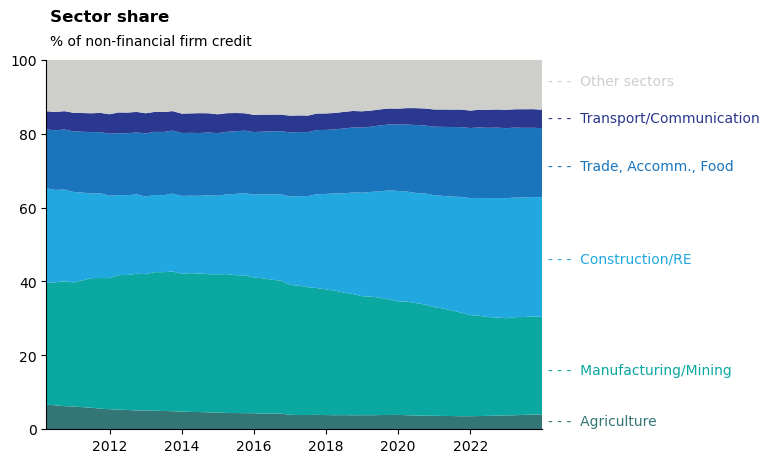

In [32]:
fig, ax = plt.subplots()

# styles
y = [1, 15, 45, 70, 83, 93]
i = ['Agriculture', 'Manufacturing/Mining', 'Construction/RE', 'Trade, Accomm., Food', 'Transport/Communication', 'Other sectors']
c = [colors[0], colors[1], colors[3], colors[4], colors[5], colors[8]]

ax.stackplot(ifc_share.index, 
             ifc_share.T, 
             labels=['Agriculture', 'Manufacturing/Mining', 'Construction/RE', 'Trade, Accomm., Food', 'Transport/Communication', 'Other sectors'],
             colors=c)

#ax.set_title('Sector share (% of nonfinancial firm credit)', loc='left', pad=10)
ax.set_ylim([0, 100])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)
ax.set_facecolor('#FAFAFA')

# Add titles
fig.text(x=0.13, y=0.96, s='Sector share', size='large', weight='semibold') # title
fig.text(x=0.13, y=0.91, s='% of non-financial firm credit', size='medium', weight='medium') # subtitle

# Add labels
for idx in range(6):
    ax.text(x=pd.to_datetime('2024-03-01'), y=y[idx], s='- - -  '+i[idx], color=c[idx])

plt.show()

In [34]:
fig.savefig('./figures/sector_share.png', bbox_inches='tight')

In [134]:
ifc_annual = ifc.iloc[3::4, :]
data = ifc_annual.div(gdp['2010':].values)
data = data.apply(to_index) * 100
data.index = pd.to_datetime([str(yr) for yr in range(2010, 2024)])

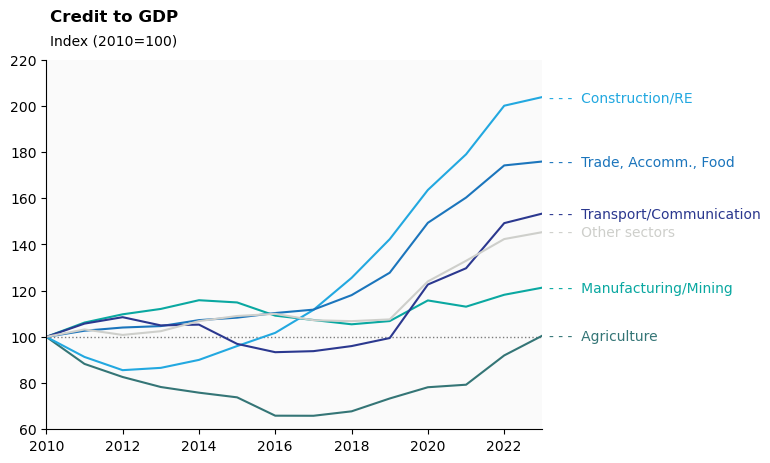

In [41]:
fig, ax = plt.subplots()

# styles
y = [100.530421, 121.316233, 203.824322, 175.919726, 153.383208, 145.339754]
i = ['Agriculture', 'Manufacturing/Mining', 'Construction/RE', 'Trade, Accomm., Food', 'Transport/Communication', 'Other sectors']
c = [colors[0], colors[1], colors[3], colors[4], colors[5], colors[8]]

ax.axhline(100, ls=':', color='k', lw=1, alpha=0.5)
for j in range(6):
    ax.plot(data.iloc[:, j], color=c[j])


#ax.set_title('Credit to GDP (Index 2010=100)', loc='left', pad=10)
ax.set_ylim([60, 220])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)
ax.set_facecolor('#FAFAFA')

# Add titles
fig.text(x=0.13, y=0.96, s='Credit to GDP', size='large', weight='semibold') # title
fig.text(x=0.13, y=0.91, s='Index (2010=100)', size='medium', weight='medium') # subtitle

# Add labels
for idx in range(6):
    ax.text(x=pd.to_datetime('2023-03-01'), y=y[idx]-2, s='- - -  '+i[idx], color=c[idx])

plt.show()

In [42]:
fig.savefig('./figures/sector_credit_to_gdp.png', bbox_inches='tight')

### **Credit Boom and Allocation**

In [184]:
ifc_annual = pd.concat([ifc_annual, ifc_annual.sum(axis=1).rename('total')], axis=1)

In [272]:
data = ifc_annual['2017':]
total = data.total.iloc[0]

data = data.sub(data.iloc[0, :])
data = data / total
data = data.drop(['total'], axis=1) * 100
data.index = range(-3, 4)

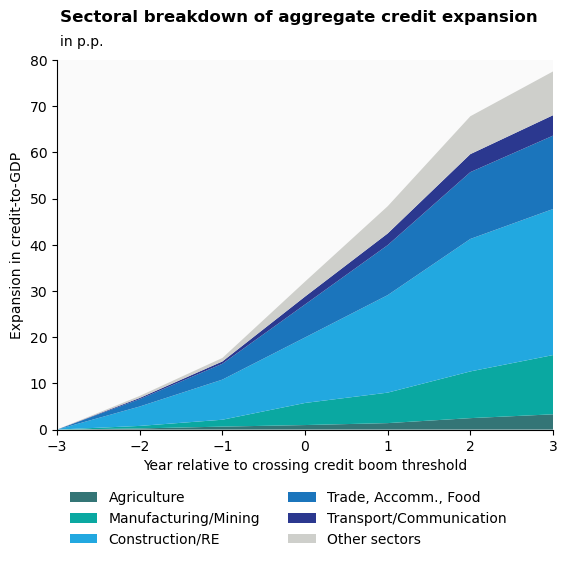

In [280]:
fig, ax = plt.subplots()

i = ['Agriculture', 'Manufacturing/Mining', 'Construction/RE', 'Trade, Accomm., Food', 'Transport/Communication', 'Other sectors']
c = [colors[0], colors[1], colors[3], colors[4], colors[5], colors[8]]

ax.stackplot(data.index, data.T, colors=c, labels=i)

ax.set_ylim([0, 80])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)
ax.set_facecolor('#FAFAFA')
ax.legend(framealpha=0, loc='lower left', bbox_to_anchor=(0, -0.35), ncols=2)
ax.set_xlabel('Year relative to crossing credit boom threshold')
ax.set_ylabel('Expansion in credit-to-GDP')

# Add titles
fig.text(x=0.13, y=0.96, s='Sectoral breakdown of aggregate credit expansion', size='large', weight='semibold') # title
fig.text(x=0.13, y=0.91, s='in p.p.', size='medium', weight='medium') # subtitle

plt.show()

In [281]:
fig.savefig('./figures/sectoral_breakdown.png', bbox_inches='tight')

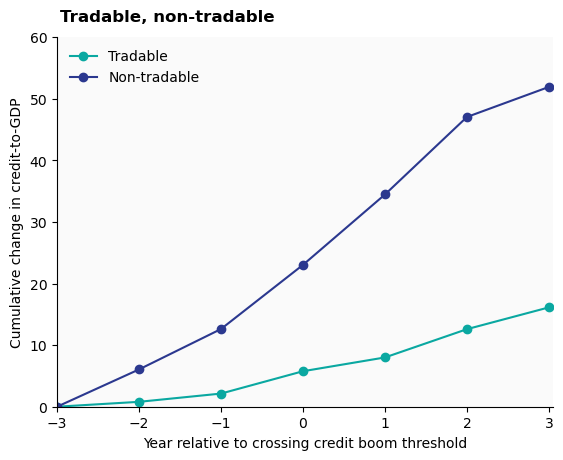

In [297]:
fig, ax = plt.subplots()

i = ['Tradable', 'Non-tradable']
c = [colors[1], colors[5]]

ax.plot(data.agr + data.mmi, label=i[0], color=c[0], marker='o')
ax.plot(data.cre + data.taf + data.tco, label=i[1], color=c[1], marker='o')

ax.set_xlim([-3, 3.05])
ax.set_ylim([0, 60])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)
ax.set_facecolor('#FAFAFA')
ax.legend(framealpha=0, loc='upper left')
ax.set_xlabel('Year relative to crossing credit boom threshold')
ax.set_ylabel('Cumulative change in credit-to-GDP')

# Add titles
fig.text(x=0.13, y=0.913, s='Tradable, non-tradable', size='large', weight='semibold') # title

plt.show()

In [298]:
fig.savefig('./figures/trade_breakdown.png', bbox_inches='tight')